In [1]:
from PathwayAnalysis import PathwayAnalysis
import matplotlib.pyplot as plt
p = PathwayAnalysis(
    interactions_path="gene_data/interactions.txt",
    gene_path="gene_data/genes.csv",
    rnacounts_path="gene_data/pe-rna-counts.csv",
    metadata_path="gene_data/pe-rna-metadata.csv",
    pickle_path='pairs.pkl'
)

### The purpose of this notebook is to determine if logistic regression conducted on pairs which share a pathway yeilds a different level of accuracy than logistic regression on genes that do not share a pathway

The `get_pathway_pair` function gets case-ctrl predictions via logistic regression regarding a pair of genes that share a pathway

In [2]:
p.get_pathway_pair()

,mcc,f1,sens,spec,tp,fn,tn,fp,pair
sc,0.496609,0.785714,0.733333,0.777778,11,4,7,2,"(FN1, VEGFA)"
mc,0.388217,0.695652,0.615385,0.777778,8,5,7,2,"(FN1, VEGFA)"
sm,0.125954,0.647059,0.733333,0.384615,11,4,5,8,"(FN1, VEGFA)"


The `get_random_pair` function gets case-ctrl predictions via logistic regression regarding a pair of genes that do not share a pathway

note that it is not a purely random pair because a random pair could potentially both be on the same pathway. So the first gene in the pair is selected randomly and the second gene is selected among all genes not in the same pathway as gene1

In [3]:
p.get_random_pair()

,mcc,f1,sens,spec,tp,fn,tn,fp,pair
sc,0.422222,0.666667,0.533333,0.888889,8,7,8,1,"(PLIN2, NOS3)"
mc,-0.244600,0.518519,0.538462,0.222222,7,6,2,7,"(PLIN2, NOS3)"
sm,0.227397,0.592593,0.533333,0.692308,8,7,9,4,"(PLIN2, NOS3)"


We get 3 samples for both pairs that share a pathway and pairs that do not. Then we compare their respective accuracies

In [4]:
random_pairs = [p.get_random_pair() for _ in range(3)]
pathway_pairs = [p.get_pathway_pair() for _ in range(3)]

In [6]:
random_pairs[0]

,mcc,f1,sens,spec,tp,fn,tn,fp,pair
sc,0.547723,0.838710,0.866667,0.666667,13,2,6,3,"(NOS3, FN1)"
mc,0.735980,0.896552,1.000000,0.666667,13,0,6,3,"(NOS3, FN1)"
sm,0.138462,0.600000,0.600000,0.538462,9,6,7,6,"(NOS3, FN1)"


There are three types of different cohort comparisions: severe/control, mild/control, and severe/mild. There are four different metrics for accuracy: mcc, spec, sens, and f1. All four metrics are plotted for all three cohort comparisons, resulting in twelve box plot comparisons

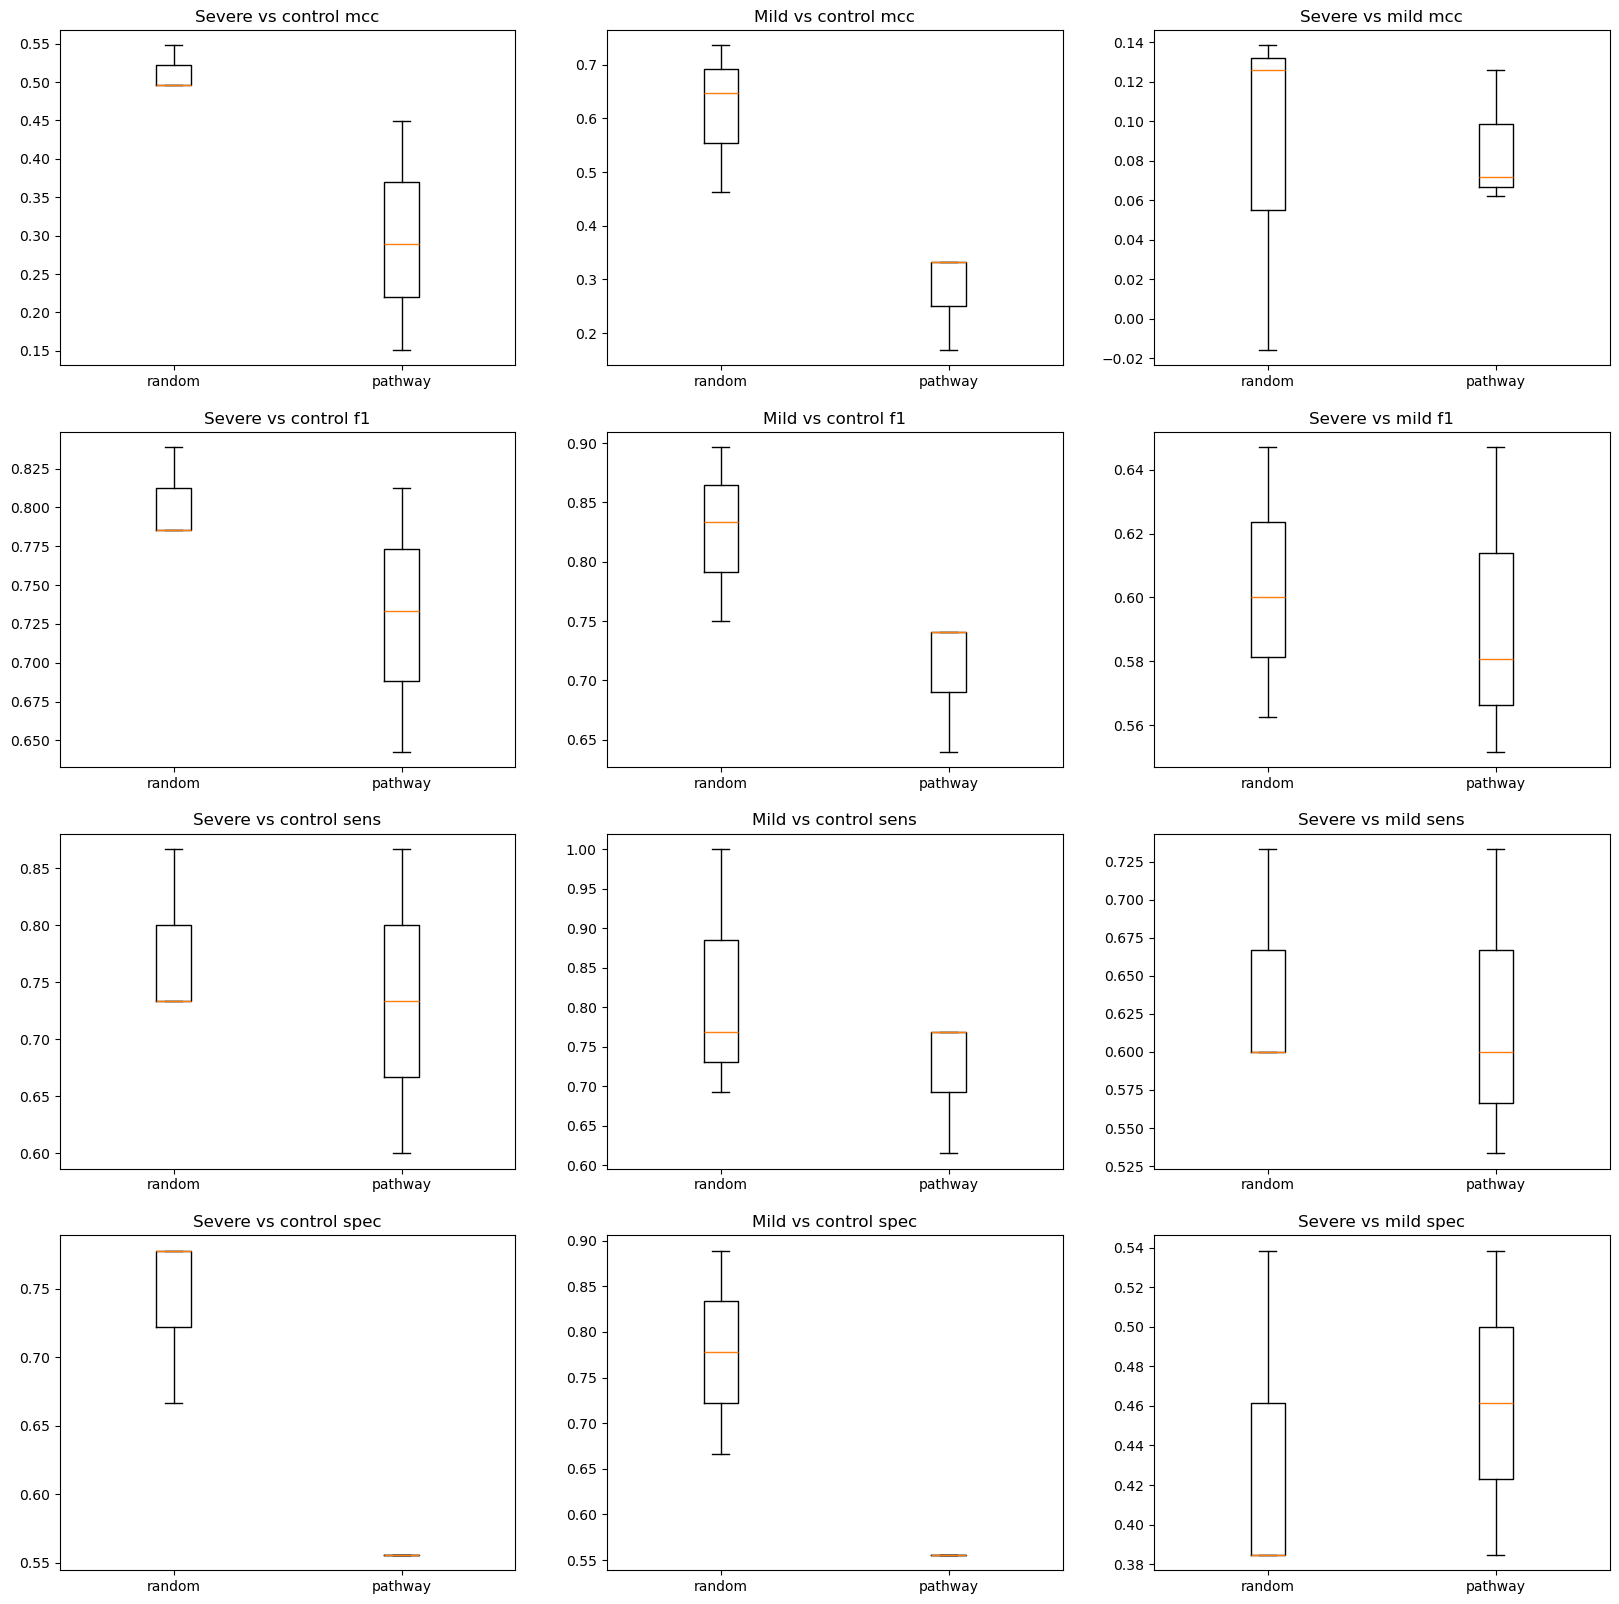

In [5]:
_, axs = plt.subplots(4, 3, figsize=(20, 20))
axs[0,0].boxplot([[x.loc['sc','mcc'] for x in random_pairs], [x.loc['sc','mcc'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[0,0].set_title("Severe vs control mcc")
axs[0,0].set_ylabel("Accuracy")

axs[1,0].boxplot([[x.loc['sc','f1'] for x in random_pairs], [x.loc['sc','f1'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[1,0].set_title("Severe vs control f1")

axs[2,0].boxplot([[x.loc['sc','sens'] for x in random_pairs], [x.loc['sc','sens'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[2,0].set_title("Severe vs control sens")

axs[3,0].boxplot([[x.loc['sc','spec'] for x in random_pairs], [x.loc['sc','spec'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[3,0].set_title("Severe vs control spec")

axs[0,1].boxplot([[x.loc['mc','mcc'] for x in random_pairs], [x.loc['mc','mcc'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[0,1].set_title("Mild vs control mcc")

axs[1,1].boxplot([[x.loc['mc','f1'] for x in random_pairs], [x.loc['mc','f1'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[1,1].set_title("Mild vs control f1")

axs[2,1].boxplot([[x.loc['mc','sens'] for x in random_pairs], [x.loc['mc','sens'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[2,1].set_title("Mild vs control sens")

axs[3,1].boxplot([[x.loc['mc','spec'] for x in random_pairs], [x.loc['mc','spec'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[3,1].set_title("Mild vs control spec")

axs[0,2].boxplot([[x.loc['sm','mcc'] for x in random_pairs], [x.loc['sm','mcc'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[0,2].set_title("Severe vs mild mcc")

axs[1,2].boxplot([[x.loc['sm','f1'] for x in random_pairs], [x.loc['sm','f1'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[1,2].set_title("Severe vs mild f1")

axs[2,2].boxplot([[x.loc['sm','sens'] for x in random_pairs], [x.loc['sm','sens'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[2,2].set_title("Severe vs mild sens")

axs[3,2].boxplot([[x.loc['sm','spec'] for x in random_pairs], [x.loc['sm','spec'] for x in pathway_pairs]], labels=['random', 'pathway'])
axs[3,2].set_title("Severe vs mild spec")

plt.show()